In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
from collections import Counter
import numpy as np
from data_class import Data

Определение языков...


In [2]:
def visualize_language_distribution(df):
    plt.figure(figsize=(12, 6))
    
    language_counts = df['language'].value_counts()
    
    plt.subplot(1, 2, 1)
    language_counts.plot(kind='bar')
    plt.title('Распределение языков в датасете')
    plt.xlabel('Язык')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%')
    plt.title('Процентное соотношение языков')
    
    plt.tight_layout()
    plt.show()
    
    print("Статистика по языкам:")
    for lang, count in language_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{lang}: {count} ({percentage:.2f}%)")


In [3]:
def analyze_task_lengths(df):
    df['task_char_length'] = df['task'].astype(str).str.len()
    df['task_word_length'] = df['task'].astype(str).str.split().str.len()
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.hist(df['task_char_length'], bins=50, alpha=0.7, edgecolor='black')
    plt.title('Распределение длины задач (символы)')
    plt.xlabel('Количество символов')
    plt.ylabel('Частота')
    
    plt.subplot(2, 3, 2)
    plt.hist(df['task_word_length'], bins=50, alpha=0.7, edgecolor='black')
    plt.title('Распределение длины задач (слова)')
    plt.xlabel('Количество слов')
    plt.ylabel('Частота')
    
    plt.subplot(2, 3, 3)
    plt.boxplot([df['task_char_length'], df['task_word_length']], labels=['Символы', 'Слова'])
    plt.title('Боксплот длины задач')
    plt.ylabel('Длина')
    
    plt.subplot(2, 3, 4)
    sns.scatterplot(data=df, x='task_char_length', y='task_word_length')
    plt.title('Соотношение символов и слов')
    plt.xlabel('Символы')
    plt.ylabel('Слова')
    
    plt.subplot(2, 3, 5)
    df.groupby('language')['task_char_length'].mean().plot(kind='bar')
    plt.title('Средняя длина задач по языкам (символы)')
    plt.xlabel('Язык')
    plt.ylabel('Средняя длина')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 6)
    df.groupby('language')['task_word_length'].mean().plot(kind='bar')
    plt.title('Средняя длина задач по языкам (слова)')
    plt.xlabel('Язык')
    plt.ylabel('Средняя длина')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\nСтатистика длины задач:")
    print(f"Символы - Среднее: {df['task_char_length'].mean():.2f}, Медиана: {df['task_char_length'].median():.2f}")
    print(f"Слова - Среднее: {df['task_word_length'].mean():.2f}, Медиана: {df['task_word_length'].median():.2f}")
    print(f"Минимум символов: {df['task_char_length'].min()}")
    print(f"Максимум символов: {df['task_char_length'].max()}")
    print(f"Минимум слов: {df['task_word_length'].min()}")
    print(f"Максимум слов: {df['task_word_length'].max()}")

In [4]:
def analyze_answer_formats(df):
    def parse_answer(answer_str):
        if pd.isna(answer_str) or answer_str == '':
            return []
        
        answer_str = str(answer_str).strip()
        
        if answer_str.startswith('[') and answer_str.endswith(']'):
            try:
                return ast.literal_eval(answer_str)
            except:
                return [answer_str]
        else:
            return [answer_str]
    
    df['parsed_answers'] = df['answer'].apply(parse_answer)
    df['answer_count'] = df['parsed_answers'].apply(len)
    
    answer_types = []
    answer_lengths = []
    
    for answers in df['parsed_answers']:
        for answer in answers:
            if isinstance(answer, (int, float)):
                answer_types.append('numeric')
                answer_lengths.append(len(str(answer)))
            elif isinstance(answer, str):
                if answer.isdigit():
                    answer_types.append('numeric_string')
                elif re.match(r'^-?\d+\.?\d*$', answer):
                    answer_types.append('decimal')
                else:
                    answer_types.append('text')
                answer_lengths.append(len(answer))
            else:
                answer_types.append('other')
                answer_lengths.append(len(str(answer)))
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    df['answer_count'].value_counts().sort_index().plot(kind='bar')
    plt.title('Распределение количества ответов')
    plt.xlabel('Количество ответов')
    plt.ylabel('Частота')
    
    plt.subplot(2, 3, 2)
    type_counts = Counter(answer_types)
    plt.pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%')
    plt.title('Типы ответов')
    
    plt.subplot(2, 3, 3)
    plt.hist(answer_lengths, bins=30, alpha=0.7, edgecolor='black')
    plt.title('Распределение длины ответов')
    plt.xlabel('Длина ответа')
    plt.ylabel('Частота')
    
    plt.subplot(2, 3, 4)
    df['answer_count'].plot(kind='hist', bins=20, alpha=0.7)
    plt.title('Гистограмма количества ответов')
    plt.xlabel('Количество ответов')
    plt.ylabel('Частота')
    
    plt.subplot(2, 3, 5)
    answer_by_lang = df.groupby('language')['answer_count'].mean()
    answer_by_lang.plot(kind='bar')
    plt.title('Среднее количество ответов по языкам')
    plt.xlabel('Язык')
    plt.ylabel('Среднее количество ответов')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\nСтатистика по формату ответов:")
    print(f"Общее количество задач: {len(df)}")
    print(f"Среднее количество ответов на задачу: {df['answer_count'].mean():.2f}")
    print(f"Медиана количества ответов: {df['answer_count'].median():.2f}")
    print(f"Максимальное количество ответов: {df['answer_count'].max()}")
    print(f"Минимальное количество ответов: {df['answer_count'].min()}")
    
    print("\nРаспределение по количеству ответов:")
    for count, freq in df['answer_count'].value_counts().sort_index().items():
        percentage = (freq / len(df)) * 100
        print(f"{count} ответ(ов): {freq} задач ({percentage:.2f}%)")
    
    print("\nТипы ответов:")
    for answer_type, count in Counter(answer_types).items():
        percentage = (count / len(answer_types)) * 100
        print(f"{answer_type}: {count} ({percentage:.2f}%)")
    
    print(f"\nСредняя длина ответа: {np.mean(answer_lengths):.2f} символов")
    print(f"Медианная длина ответа: {np.median(answer_lengths):.2f} символов")

In [5]:
data_manager = Data()
train_df = data_manager.get_train_data()

1. Визуализация распределения языков...


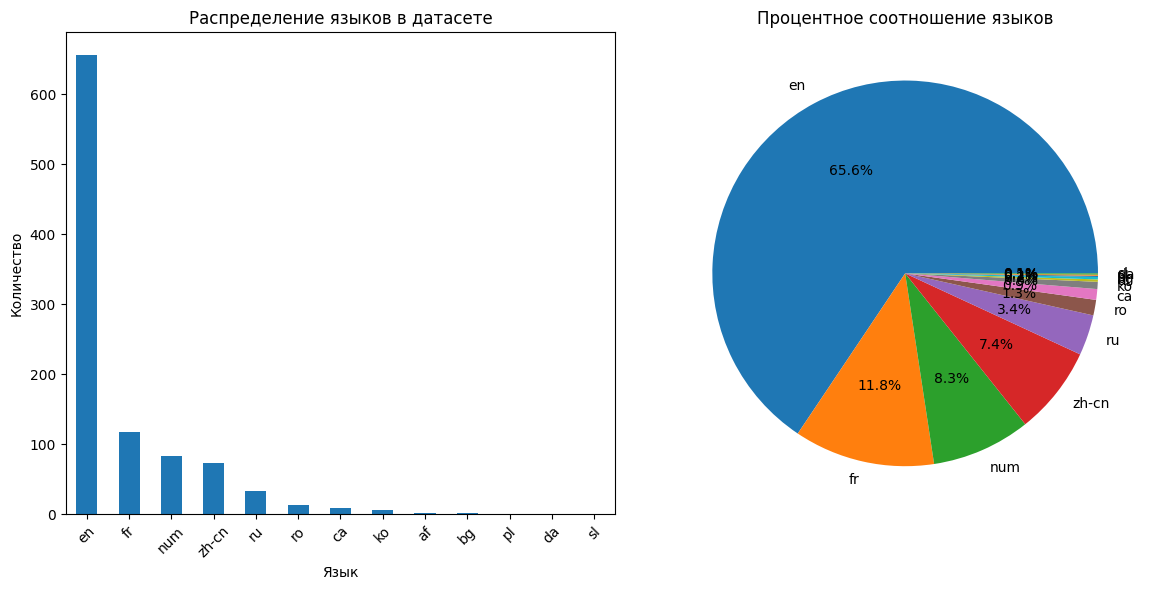

Статистика по языкам:
en: 656 (65.60%)
fr: 118 (11.80%)
num: 83 (8.30%)
zh-cn: 74 (7.40%)
ru: 34 (3.40%)
ro: 13 (1.30%)
ca: 9 (0.90%)
ko: 6 (0.60%)
af: 2 (0.20%)
bg: 2 (0.20%)
pl: 1 (0.10%)
da: 1 (0.10%)
sl: 1 (0.10%)


In [6]:
print("1. Визуализация распределения языков...")
visualize_language_distribution(train_df)


2. Анализ длины задач...


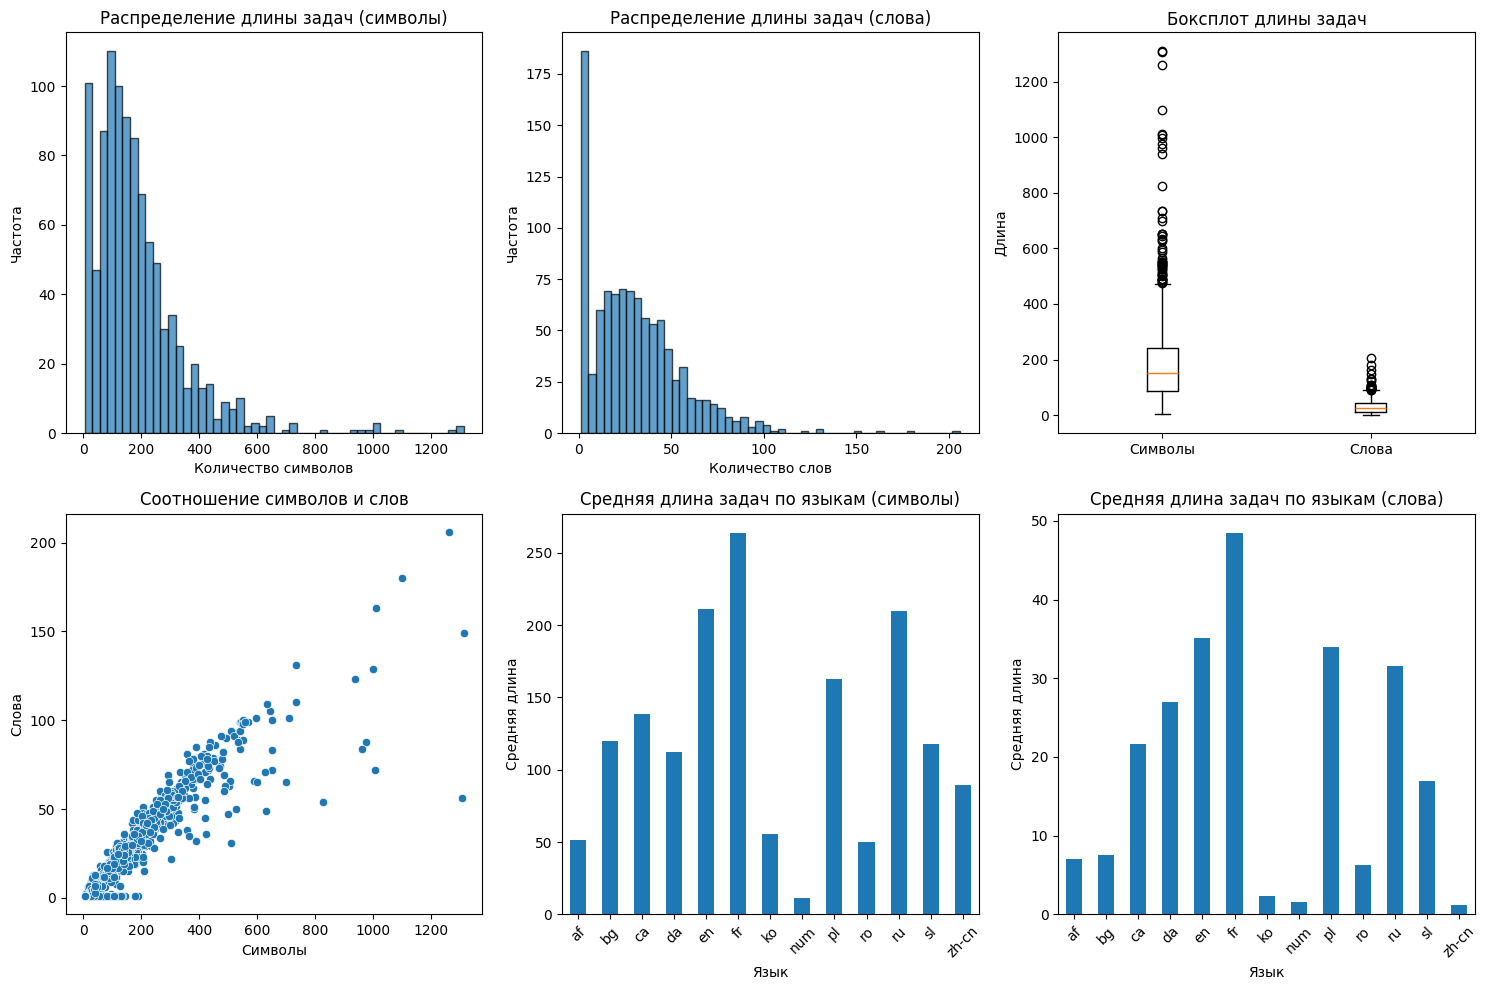


Статистика длины задач:
Символы - Среднее: 187.07, Медиана: 151.00
Слова - Среднее: 30.46, Медиана: 27.00
Минимум символов: 4
Максимум символов: 1312
Минимум слов: 1
Максимум слов: 206


In [7]:

print("\n2. Анализ длины задач...")
analyze_task_lengths(train_df)


3. Анализ формата ответов...


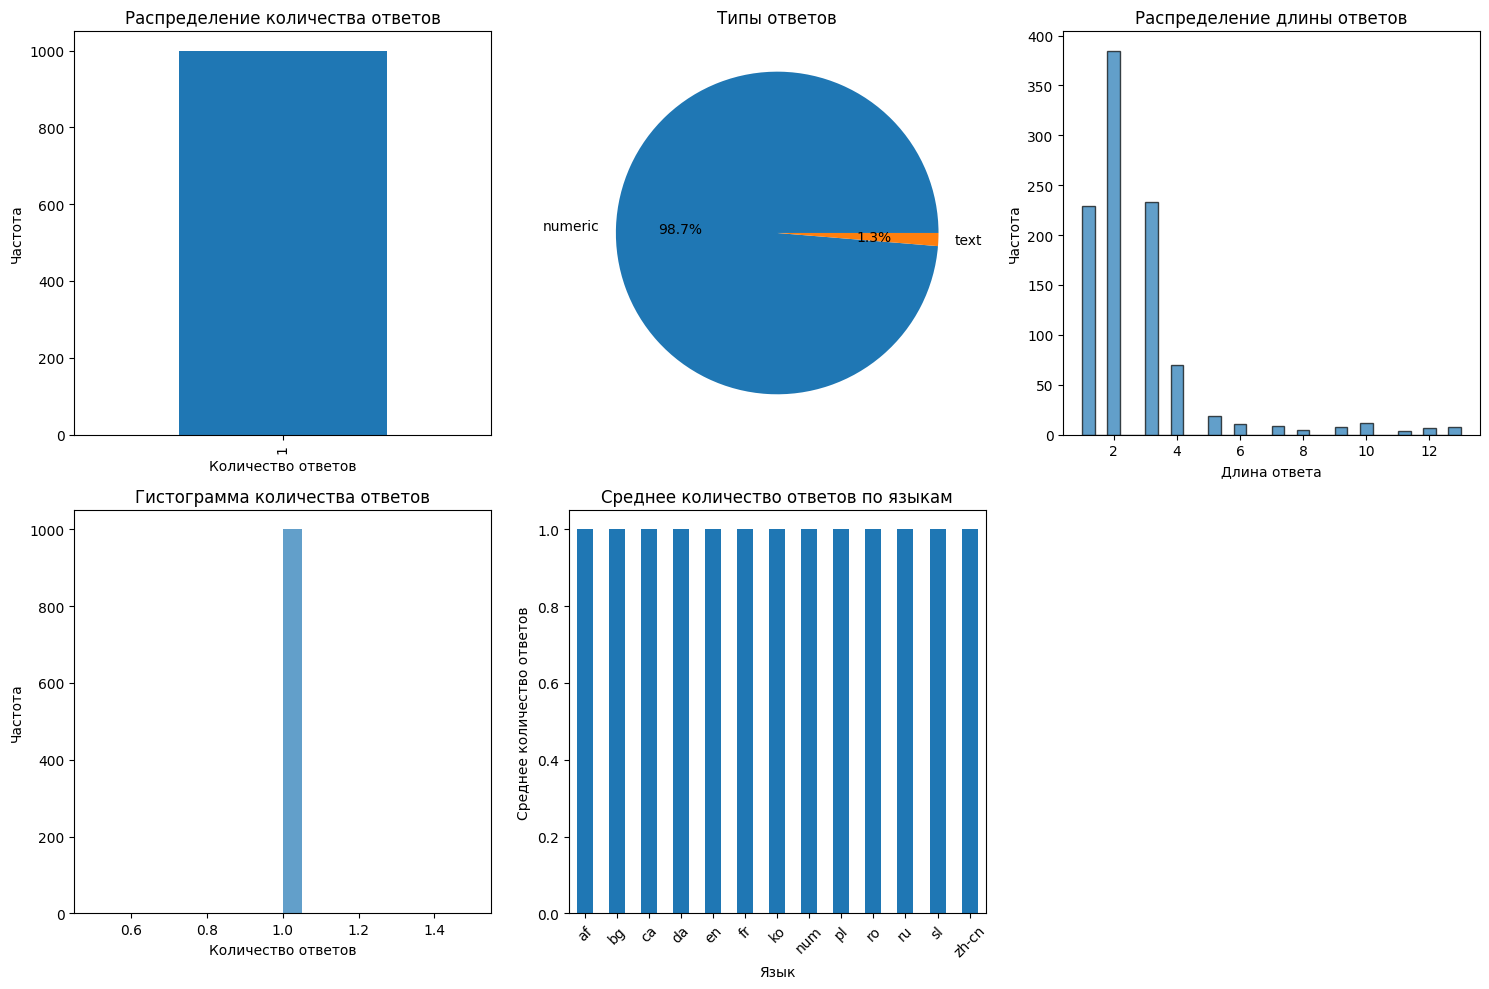


Статистика по формату ответов:
Общее количество задач: 1000
Среднее количество ответов на задачу: 1.00
Медиана количества ответов: 1.00
Максимальное количество ответов: 1
Минимальное количество ответов: 1

Распределение по количеству ответов:
1 ответ(ов): 1000 задач (100.00%)

Типы ответов:
numeric: 987 (98.70%)
text: 13 (1.30%)

Средняя длина ответа: 2.67 символов
Медианная длина ответа: 2.00 символов


In [8]:
print("\n3. Анализ формата ответов...")
analyze_answer_formats(train_df)

In [9]:
data_manager.close()